# Segmentación de Figuras
- Color
- Forma 

## Importar las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from skimage.measure import label, regionprops
from skimage.util import invert

# Acceder a repo de Github
! git clone https://github.com/brokenerk/Advanced-Neuronal-Networks.git

Cloning into 'Advanced-Neuronal-Networks'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 117 (delta 41), reused 111 (delta 38), pack-reused 0
Receiving objects: 100% (117/117), 3.07 MiB | 24.94 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [2]:
! ls

Advanced-Neuronal-Networks  sample_data


### Lectura de archivos de imágenes 

In [0]:
img = Image.open("./Advanced-Neuronal-Networks/CaracteristicasFiguras/figuras.jpg")
foto = Image.open("./Advanced-Neuronal-Networks/CaracteristicasFiguras/foto.jpg")

## Análisis de los datos

In [4]:
# Transformar a un arreglo
AImg = np.array(img)
AFoto = np.array(foto)
print("Figura: ", AImg.shape)
print("Foto: ", AFoto.shape)

Figura:  (720, 960, 3)
Foto:  (244, 322, 3)


In [5]:
# Verificar los canales de color
img.getbands()
print("Figura: ", img.getbands())
print("Foto: ", foto.getbands())

Figura:  ('R', 'G', 'B')
Foto:  ('R', 'G', 'B')


Text(0.5, 1.0, 'Foto')

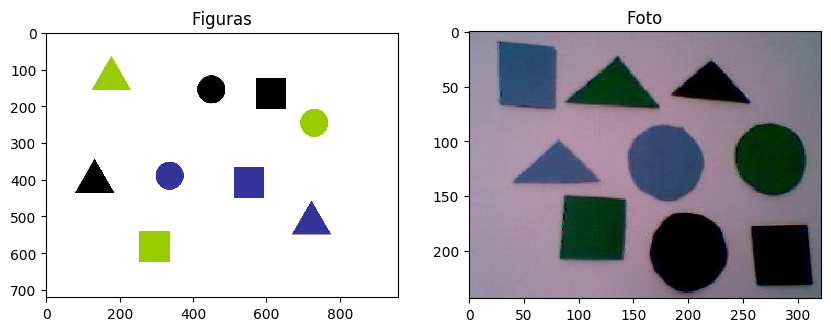

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4), dpi = 100)

# Graficar la imágen
axes[0].imshow(AImg)
axes[0].set_title("Figuras")
axes[1].imshow(AFoto)
axes[1].set_title("Foto")

Text(0.5, 1.0, 'Foto')

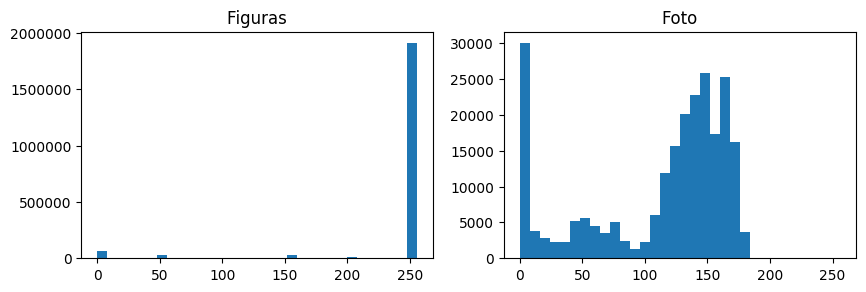

In [7]:
# Graficamos un histograma con el valor de los pixeles
# para seleccionar un umbral de conversion a B/N
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3), dpi = 100)

axes[0].hist(AImg.ravel(), bins = 32, range = [0, 256])
axes[0].set_title("Figuras")
axes[1].hist(AFoto.ravel(), bins = 32, range = [0, 256])
axes[1].set_title("Foto")

## Convertir imágenes a blanco y negro (binario)

In [0]:
def binarizar_arreglo(arr, threshold):
    arr[arr > threshold] = 255
    arr[arr <= threshold] = 0
    return arr

Text(0.5, 1.0, 'Foto')

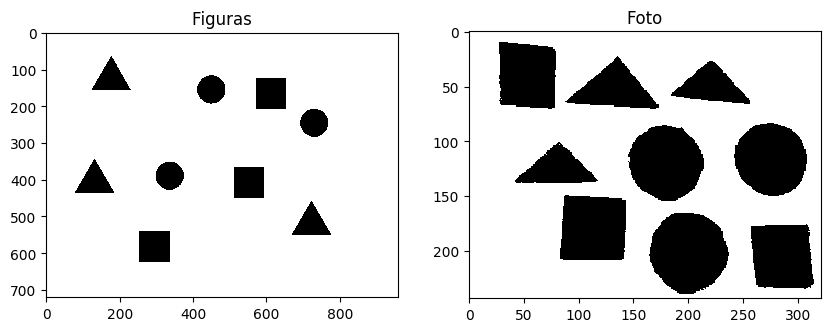

In [9]:
#Convertir imágenes a monocromatico
AImgBN = binarizar_arreglo(np.array(img.convert('L')), 200)
AFotoBN = binarizar_arreglo(np.array(foto.convert('L')), 90)

# Graficar las imágenes en blanco y negro
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4), dpi = 100)
axes[0].imshow(AImgBN, cmap = 'gray')
axes[0].set_title("Figuras")
axes[1].imshow(AFotoBN, cmap = 'gray')
axes[1].set_title("Foto")

El fondo blanco tiene un valor de 255 y las figuras en color negro tienen un valor de 0

# Separar las figuras de la imágen

In [0]:
def separar_imagen(arrRGB, arrBN, axes):
    # Encontrar regiones con pixeles cercanos del mismo valor (clustering)
    # indicandole que el fondo es blanco = 255
    label_img = label(arrBN, background = 255)

    # Obtener las propiedades de dichas regiones
    regions = regionprops(label_img)
    sep = []
    pad = 10

    # Dibujar la bounding box para cada figura
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        axes.plot(bx, by, '-r')

        # Guardar cada figura en una lista por separado
        sep.append(arrRGB[minr - pad:maxr + pad, minc - pad:maxc + pad])
    return sep

Text(0.5, 1.0, 'Foto')

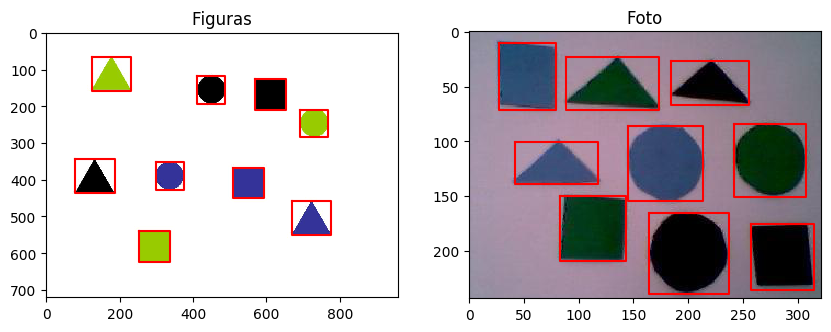

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4), dpi = 100)

axes[0].imshow(AImg)
figuras_separadas = separar_imagen(AImg, AImgBN, axes[0])
axes[0].set_title("Figuras")

axes[1].imshow(AFoto)
figuras_separadas_foto = separar_imagen(AFoto, AFotoBN, axes[1])
axes[1].set_title("Foto")

# Detectando el color por valor del pixel 
### Extrayendo las características 

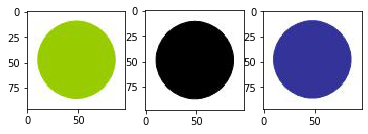

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)
axes[0].imshow(figuras_separadas[3])
axes[1].imshow(figuras_separadas[1])
axes[2].imshow(figuras_separadas[5])

In [13]:
print("Para las figuras")
print("Verde: ", figuras_separadas[3][60, 60])
print("Negro: ", figuras_separadas[1][60, 60])
print("Azul: ", figuras_separadas[5][60, 60])

Para las figuras
Verde:  [152 203   0]
Negro:  [0 0 0]
Azul:  [ 52  51 153]


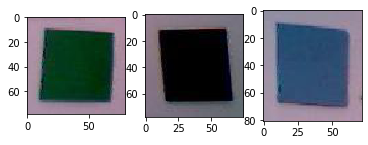

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)
axes[0].imshow(figuras_separadas_foto[6])
axes[1].imshow(figuras_separadas_foto[8])
axes[2].imshow(figuras_separadas_foto[0])

In [15]:
print("Para las fotos")
print("Verde: ", figuras_separadas_foto[6][30, 30])
print("Negro: ", figuras_separadas_foto[8][30, 30])
print("Azul: ", figuras_separadas_foto[0][30, 30])

Para las fotos
Verde:  [ 1 58 25]
Negro:  [0 0 0]
Azul:  [ 40  76 110]


# Clasificador de color

In [0]:
#importar sklearn
from sklearn.neural_network import MLPClassifier

## Preparando los datos 

Para este primer caso usaremos aprendizaje supervisado. Los datos de entrenamiento consisten en pares ordenados donde hay una lista de entradas y una lista de salidas:

### Entradas
x = [[0,0,0],[1,0,0],[0,0,1]]

### Salidas 

(Necesario codificarlas) 
- verde = 1,0,0
- negro = 0,1,0
- azul  = 0,0,1

y = [[1,0,0],[0,1,0],[0,0,1]]



In [0]:
colores = {'verde': [1, 0, 0], 'negro': [0, 1, 0], 'azul': [0, 0, 1]}

def etiquetar_colores_fig(lista):
    tags = []
    train_data = []
    for img in lista:
        color = img[60, 60].tolist()

        if color == [152, 203, 0]:
            tags.append(colores['verde'])
        elif color == [0, 0, 0]:
            tags.append(colores['negro'])
        else:
            tags.append(colores['azul'])
        
        train_data.append(img[60, 60])
        
    return np.array(train_data), tags 

In [0]:
X_train1, y_train1 = etiquetar_colores_fig(figuras_separadas)
X_test1, y_test1 = X_train1, y_train1

In [19]:
y_train1

[[1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0]]

In [0]:
def etiquetar_colores_foto(lista):
    tags = []
    train_data = []

    tags.append(colores['azul'])
    train_data.append(lista[0][30, 30])
    
    tags.append(colores['verde'])
    train_data.append(lista[1][30, 30])
    
    tags.append(colores['negro'])
    train_data.append(lista[2][30, 30])
    
    tags.append(colores['azul'])
    train_data.append(lista[3][30, 30])
    
    tags.append(colores['azul'])
    train_data.append(lista[4][30, 30])
    
    tags.append(colores['verde'])
    train_data.append(lista[5][30, 30])
    
    tags.append(colores['verde'])
    train_data.append(lista[6][30, 30])
    
    tags.append(colores['negro'])
    train_data.append(lista[7][30, 30])
    
    tags.append(colores['negro'])
    train_data.append(lista[8][30, 30])
        
    return np.array(train_data), tags 

In [0]:
X_train2, y_train2 = etiquetar_colores_foto(figuras_separadas_foto)
X_test2, y_test2 = X_train2, y_train2

In [22]:
y_train2

[[0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0]]

## Ajustar Parámetros del modelo

In [0]:
clfcolor_fig = MLPClassifier(solver = 'lbfgs', alpha = 1e-5,
                  hidden_layer_sizes = (10, 9), random_state = 1)
clfcolor_foto = clfcolor_fig

## Ajuste del modelo

In [24]:
clfcolor_fig.fit(X_train1, y_train1)
clfcolor_foto.fit(X_train2, y_train2)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 9), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
pred1 = clfcolor_fig.predict(X_test1)
pred2 = clfcolor_foto.predict(X_test2)

## Evaluar al modelo 

In [0]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [0]:
def ClassDetector(onehot):
    output = []
    for caso in onehot:
        output.append(np.argmax(caso))
    return output

In [28]:
predclass_fig = ClassDetector(pred1)
yclass_fig = ClassDetector(y_test1)
predclass_foto = ClassDetector(pred2)
yclass_foto = ClassDetector(y_test2)

print("Figuras")
print(predclass_fig)
print(yclass_fig)

print("\nFoto")
print(predclass_foto)
print(yclass_foto)

Figuras
[0, 1, 1, 0, 1, 2, 2, 2, 0]
[0, 1, 1, 0, 1, 2, 2, 2, 0]

Foto
[2, 0, 1, 2, 2, 0, 0, 1, 1]
[2, 0, 1, 2, 2, 0, 0, 1, 1]


In [29]:
print("Figura Acc: ", accuracy_score(predclass_fig, yclass_fig)) 
print("Foto Acc: ", accuracy_score(predclass_foto, yclass_foto)) 

Figura Acc:  1.0
Foto Acc:  1.0


In [30]:
print("Figura:")
print(confusion_matrix(predclass_fig, yclass_fig))
print("\nFoto:")
print(confusion_matrix(predclass_foto, yclass_foto))

Figura:
[[3 0 0]
 [0 3 0]
 [0 0 3]]

Foto:
[[3 0 0]
 [0 3 0]
 [0 0 3]]


# Clasificador de forma

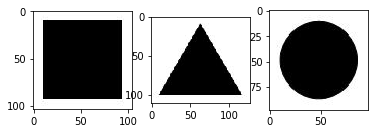

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)
axes[0].imshow(figuras_separadas[2])
axes[1].imshow(figuras_separadas[4])
axes[2].imshow(figuras_separadas[1])

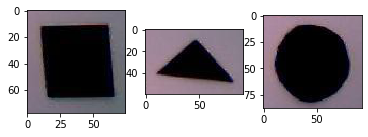

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)
axes[0].imshow(figuras_separadas_foto[8])
axes[1].imshow(figuras_separadas_foto[2])
axes[2].imshow(figuras_separadas_foto[7])

## Determinando las características adecuadas 

### Usando Momentos de Hu como descriptor invariante 

El problema de identificación de formas se ha estudiado durante mucho tiempo, como resultado se han propuesto metodologías de extracción de características invariantes a rotación, traslación y escalamiento. Estas características son los momentos invariables de Hu.

Para mayor detalle favor de consultar el capítulo de extracción de características del libro Gonzalez & Woods, Digital Image Processing: http://www.sc.ehu.es/ccwgrrom/transparencias/pdf-vision-1-transparencias/capitulo-8.pdf

In [0]:
def umbral_image(img):
    x, y = img.shape
    z = np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if img[i,j] > 25:
                z[i,j] = 250
    return z

In [0]:
# Creando una función para extraer los momentos de hu 
def hu_Characteristics(fig):
    #Convertir imagen a monocromatica (1 canal)
    aux = Image.fromarray(fig, 'RGB').convert('L')
    img = np.array(aux)
    
    #Invertir imagen
    Iing = invert(img)
    Uing = umbral_image(Iing)
    
    #Binarizar imagen
    label_image = label(Uing)
    regions = regionprops(label_image)
    momento = regions[0].moments_hu
    return momento

In [35]:
hu_cua = hu_Characteristics(figuras_separadas[2]).tolist()
hu_tri = hu_Characteristics(figuras_separadas[4]).tolist()
hu_circ = hu_Characteristics(figuras_separadas[1]).tolist()

print("Momentos del cuadrado {}".format(hu_cua))
print("Momentos del triangulo {}".format(hu_tri))
print("Momentos del circulo {}".format(hu_circ))

Momentos del cuadrado [0.16664304610733183, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Momentos del triangulo [0.19253339530942054, 1.986598491706027e-07, 0.004578058003033394, 3.517119257068013e-09, -4.314320634512684e-15, -1.1083542685642172e-12, -1.3437454781372e-14]
Momentos del circulo [0.15916636051399355, 3.758800815687191e-08, 6.435124677391742e-08, 3.838217413500349e-12, 1.535707379321003e-21, -2.8595116112345017e-16, -1.1315025682988466e-21]


## Preparando los datos

Para este primer caso usaremos aprendizaje supervisado, los datos de entrenamiento consisten en pares ordenados donde hay una lista de entradas y una lista de salidas 

### Entradas
x = [[0,0,0],[1,0,0],[0,0,1]]

### Salidas 

(Necesario codificarlas) 
- Cuadrado  = 1,0,0
- Triángulo = 0,1,0
- Círculo   = 0,0,1

y = [[1,0,0],[0,1,0],[0,0,1]]

In [0]:
formas = {'cuadrado': [1, 0, 0], 'triangulo': [0, 1, 0], 'circulo': [0, 0, 1]}

def etiquetar_formas_fig(lista):
    tags = []
    train_data = []
    
    tags.append(formas['triangulo'])
    train_data.append(hu_Characteristics(lista[0]))
    
    tags.append(formas['circulo'])
    train_data.append(hu_Characteristics(lista[1]))
    
    tags.append(formas['cuadrado'])
    train_data.append(hu_Characteristics(lista[2]))
    
    tags.append(formas['circulo'])
    train_data.append(hu_Characteristics(lista[3]))
    
    tags.append(formas['triangulo'])
    train_data.append(hu_Characteristics(lista[4]))
    
    tags.append(formas['circulo'])
    train_data.append(hu_Characteristics(lista[5]))
    
    tags.append(formas['cuadrado'])
    train_data.append(hu_Characteristics(lista[6]))
    
    tags.append(formas['triangulo'])
    train_data.append(hu_Characteristics(lista[7]))
    
    tags.append(formas['cuadrado'])
    train_data.append(hu_Characteristics(lista[8]))
    
    return np.array(train_data), tags 

In [0]:
X_train1, y_train1 = etiquetar_formas_fig(figuras_separadas)
X_test1, y_test1 = X_train1, y_train1

In [38]:
y_train1

[[0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0]]

In [0]:
def etiquetar_formas_foto(lista):
    tags = []
    train_data = []
    
    tags.append(formas['cuadrado'])
    train_data.append(hu_Characteristics(lista[0]))
    
    tags.append(formas['triangulo'])
    train_data.append(hu_Characteristics(lista[1]))
    
    tags.append(formas['triangulo'])
    train_data.append(hu_Characteristics(lista[2]))
    
    tags.append(formas['triangulo'])
    train_data.append(hu_Characteristics(lista[3]))
    
    tags.append(formas['circulo'])
    train_data.append(hu_Characteristics(lista[4]))
    
    tags.append(formas['circulo'])
    train_data.append(hu_Characteristics(lista[5]))
    
    tags.append(formas['cuadrado'])
    train_data.append(hu_Characteristics(lista[6]))
    
    tags.append(formas['circulo'])
    train_data.append(hu_Characteristics(lista[7]))
    
    tags.append(formas['cuadrado'])
    train_data.append(hu_Characteristics(lista[8]))
    
    return np.array(train_data), tags 

In [0]:
X_train2, y_train2 = etiquetar_formas_foto(figuras_separadas_foto)
X_test2, y_test2 = X_train2, y_train2

In [41]:
y_train2

[[1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0]]

## Ajustar Parámetros del modelo

In [0]:
clforma_fig = MLPClassifier(solver = 'lbfgs', alpha = 1e-5,
                  hidden_layer_sizes = (10, 25), random_state = 1)
clforma_foto = clforma_fig

## Ajuste del modelo

In [43]:
clforma_fig.fit(X_train1, y_train1)
clforma_foto.fit(X_train2, y_train2)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 25), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
pred1 = clforma_fig.predict(X_test1)
pred2 = clforma_foto.predict(X_test2)

## Evaluar al modelo 

In [45]:
predclass_fig = ClassDetector(pred1)
yclass_fig = ClassDetector(y_test1)
predclass_foto = ClassDetector(pred2)
yclass_foto = ClassDetector(y_test2)

print("Figuras")
print(predclass_fig)
print(yclass_fig)

print("\nFoto")
print(predclass_foto)
print(yclass_foto)

Figuras
[1, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 2, 0, 2, 1, 2, 0, 1, 0]

Foto
[0, 1, 1, 0, 0, 1, 0, 0, 0]
[0, 1, 1, 1, 2, 2, 0, 2, 0]


In [46]:
print("Figura Acc: ", accuracy_score(predclass_fig, yclass_fig)) 
print("Foto Acc: ", accuracy_score(predclass_foto, yclass_foto)) 

Figura Acc:  0.6666666666666666
Foto Acc:  0.5555555555555556


In [47]:
print("Figura:")
print(confusion_matrix(predclass_fig, yclass_fig))
print("\nFoto:")
print(confusion_matrix(predclass_foto, yclass_foto))

Figura:
[[3 0 3]
 [0 3 0]
 [0 0 0]]

Foto:
[[3 1 2]
 [0 2 1]
 [0 0 0]]
